## Import initial libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Load the dataset

In [2]:
df = pd.read_excel('dataset.xlsx')
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PTOs Utilized
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,3,1,8,0,1,6,4,0,5,16
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,4,4,10,3,3,10,7,1,7,10
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,3,2,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,3,3,8,3,3,8,7,3,0,2
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,3,4,6,3,3,2,2,2,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,Research & Development,23,2,Medical,3,Male,4,...,3,3,17,3,3,5,2,0,3,1
1466,39,No,Travel_Rarely,Research & Development,6,1,Medical,4,Male,2,...,3,1,9,5,3,7,7,1,7,1
1467,27,No,Travel_Rarely,Research & Development,4,3,Life Sciences,2,Male,4,...,4,2,6,0,3,6,2,0,3,1
1468,49,No,Travel_Frequently,Sales,2,3,Medical,4,Male,2,...,3,4,17,3,2,9,6,0,8,1


In [3]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
categorical_cols = [
    "OverTime",
    "MaritalStatus",
    "JobRole",
    "Gender",
    "EducationField",
    "Department",
    "BusinessTravel",
    "Attrition"
]

# Initialize encoder
le = LabelEncoder()

# Store legend mapping
legend = {}

for col in categorical_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col].astype(str))
        legend[col] = dict(zip(le.classes_, range(len(le.classes_))))

# Print legend
print("=== LEGEND: String-to-Number Mapping ===\n")
for col, mapping in legend.items():
    print(f"{col}:")
    for k, v in mapping.items():
        print(f"  '{k}' → {v}")
    print()

# Display preview
print("=== SAMPLE OF ENCODED DATA ===")
df.head()

=== LEGEND: String-to-Number Mapping ===

OverTime:
  'No' → 0
  'Yes' → 1

MaritalStatus:
  'Divorced' → 0
  'Married' → 1
  'Single' → 2

JobRole:
  'Healthcare Representative' → 0
  'Human Resources' → 1
  'Laboratory Technician' → 2
  'Manager' → 3
  'Manufacturing Director' → 4
  'Research Director' → 5
  'Research Scientist' → 6
  'Sales Executive' → 7
  'Sales Representative' → 8

Gender:
  'Female' → 0
  'Male' → 1

EducationField:
  'Human Resources' → 0
  'Life Sciences' → 1
  'Marketing' → 2
  'Medical' → 3
  'Other' → 4
  'Technical Degree' → 5

Department:
  'Human Resources' → 0
  'Research & Development' → 1
  'Sales' → 2

BusinessTravel:
  'Non-Travel' → 0
  'Travel_Frequently' → 1
  'Travel_Rarely' → 2

Attrition:
  'No' → 0
  'Yes' → 1

=== SAMPLE OF ENCODED DATA ===


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PTOs Utilized
0,41,1,2,2,1,2,1,2,0,3,...,3,1,8,0,1,6,4,0,5,16
1,49,0,1,1,8,1,1,3,1,2,...,4,4,10,3,3,10,7,1,7,10
2,37,1,2,1,2,2,4,4,1,2,...,3,2,7,3,3,0,0,0,0,1
3,33,0,1,1,3,4,1,4,0,3,...,3,3,8,3,3,8,7,3,0,2
4,27,0,2,1,2,1,3,1,1,3,...,3,4,6,3,3,2,2,2,2,11


In [4]:
df.describe()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PTOs Utilized
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,1.260544,9.192517,2.912925,2.247619,2.721769,0.600000,2.729932,...,3.153741,2.712245,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,9.468027
std,9.135373,0.367863,0.665455,0.527792,8.106864,1.024165,1.331369,1.093082,0.490065,0.711561,...,0.360824,1.081209,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,5.773581
min,18.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,2.000000,...,3.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,4.000000
50%,36.000000,0.000000,2.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,9.000000
75%,43.000000,0.000000,2.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,3.000000,...,3.000000,4.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,14.000000
max,60.000000,1.000000,2.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,4.000000,...,4.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,19.000000


## EDA

In [5]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Profiling Report")
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 28/28 [00:00<00:00, 1041.90it/s]
c:\Users\junni\anaconda3\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[9 0 9 ... 0 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
c:\Users\junni\anaconda3\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[9 4 9 ... 9 4 9]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
c:\Users\junni\anaconda3\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

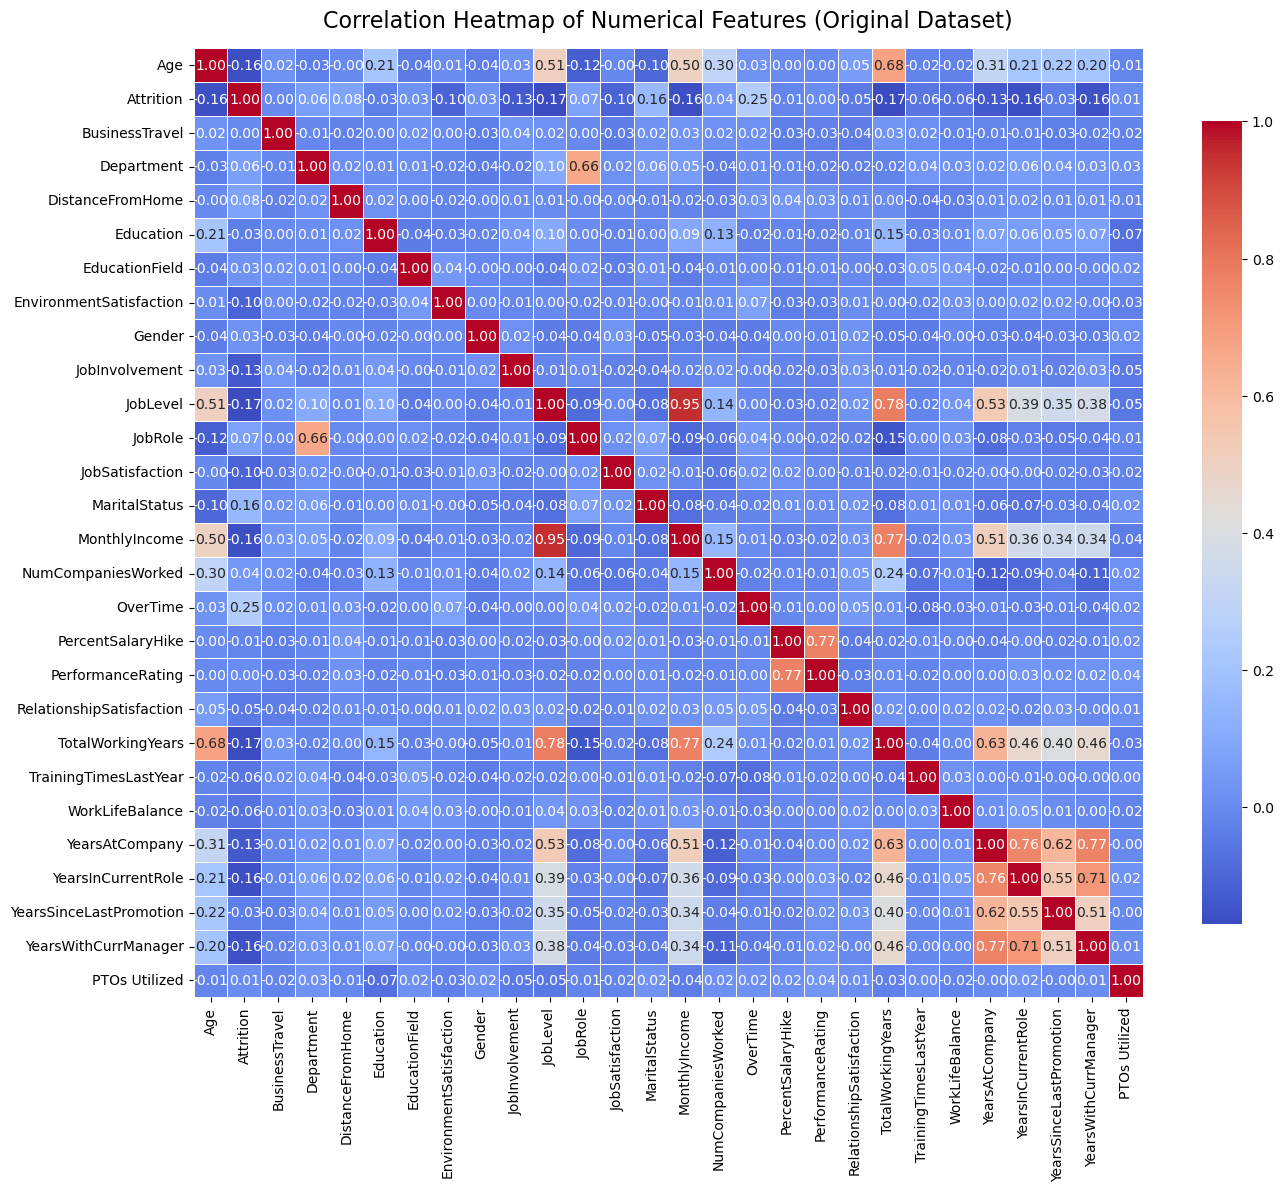

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Use the original dataset ---
# Assuming df is already loaded in memory
numeric_df = df.select_dtypes(include=['number'])

# --- Compute correlation matrix ---
corr_matrix = numeric_df.corr()

# --- Plot heatmap ---
plt.figure(figsize=(14, 12))
sns.heatmap(
    corr_matrix,
    annot=True,           # show correlation coefficients
    fmt=".2f",            # 2 decimal places
    cmap="coolwarm",      # color palette
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Heatmap of Numerical Features (Original Dataset)", fontsize=16, pad=15)
plt.tight_layout()
plt.show()


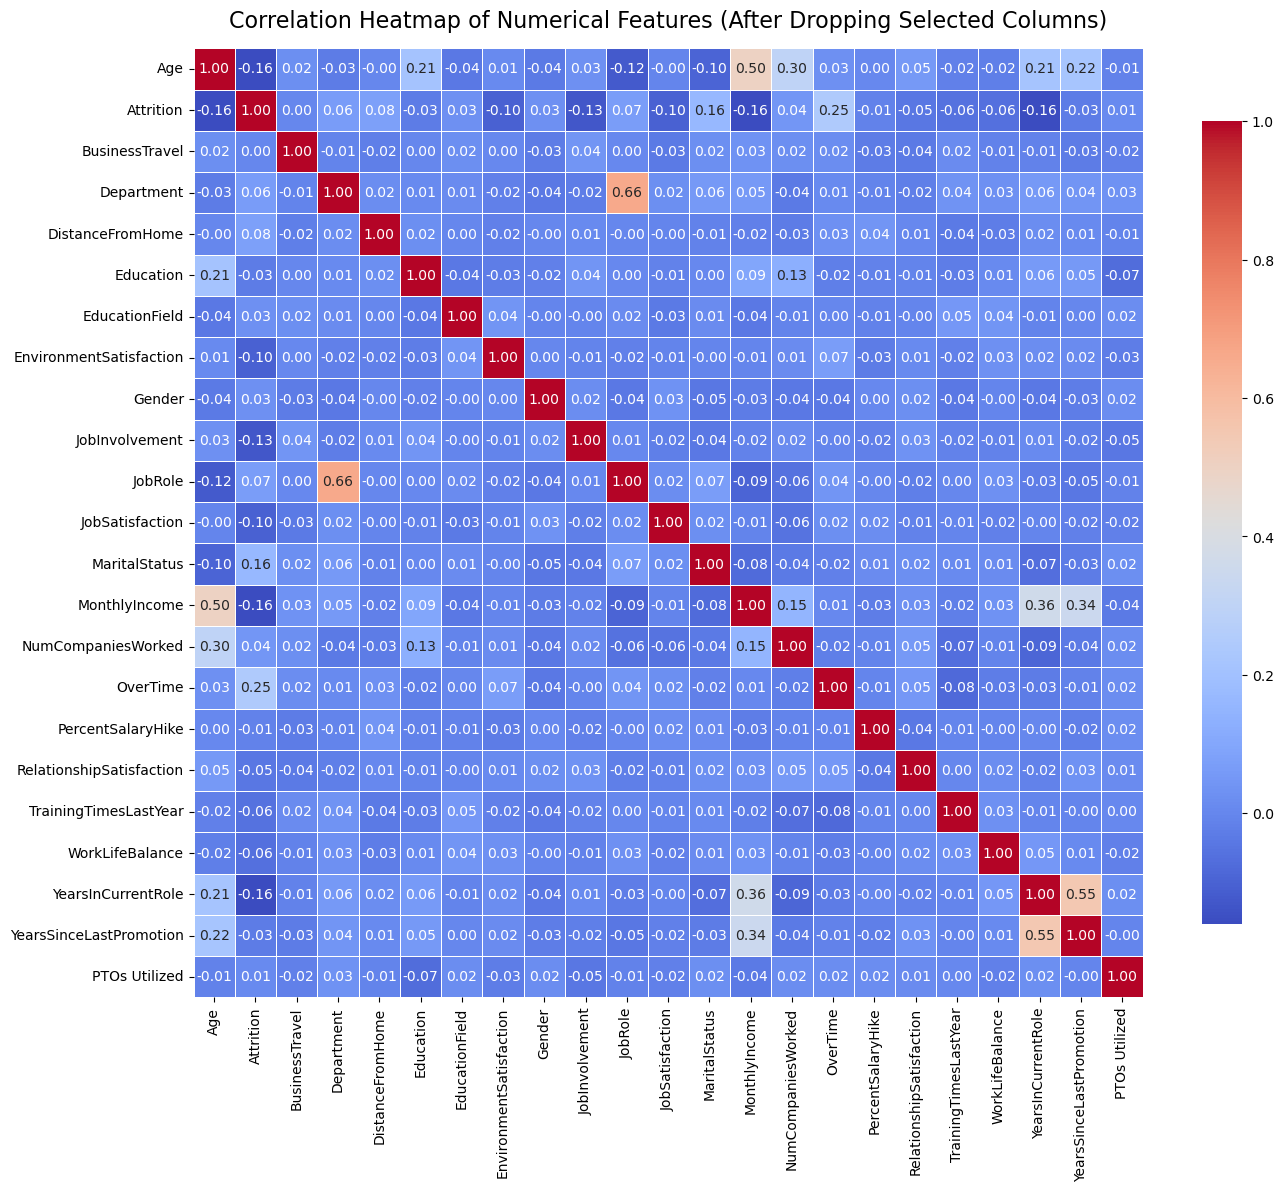

In [ ]:
cols_to_drop = [ 
    "JobLevel", 
    "TotalWorkingYears",
    "PerformanceRating",
    "YearsAtCompany",
    "YearsWithCurrManager"
]

# --- Drop defined columns if they exist ---
df_filtered = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

# --- Keep only numeric columns ---
numeric_df = df_filtered.select_dtypes(include=['number'])

# --- Compute correlation matrix ---
corr_matrix = numeric_df.corr()

# --- Plot heatmap ---
plt.figure(figsize=(14, 12))
sns.heatmap(
    corr_matrix,
    annot=True,           # show correlation coefficients
    fmt=".2f",            # 2 decimal places
    cmap="coolwarm",      # color palette
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Heatmap of Numerical Features (After Dropping Selected Columns)", fontsize=16, pad=15)
plt.tight_layout()
plt.show()

## Balancing the dataset

In [ ]:
# df = numeric_df.copy()

In [7]:
y = df['Attrition'].value_counts()
print(y)

Attrition
0    1233
1     237
Name: count, dtype: int64


In [8]:
X = df.drop(columns=['Attrition'])
y = df['Attrition']

In [9]:
from imblearn.under_sampling import RandomUnderSampler

balanced_dataset = RandomUnderSampler(sampling_strategy = "not minority", random_state = 42)
X_bal, y_bal = balanced_dataset.fit_resample(X , y)

In [ ]:
# from imblearn.combine import SMOTETomek
# smt = SMOTETomek(random_state=42)
# X_bal, y_bal = smt.fit_resample(X, y)

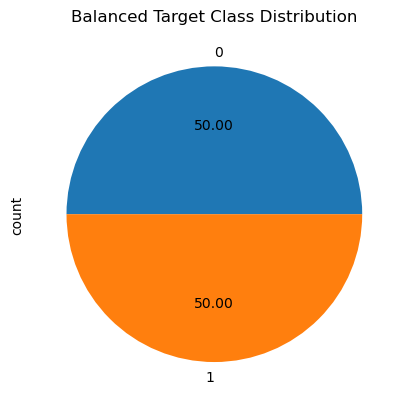

In [10]:
ax = y_bal.value_counts().plot.pie(autopct = "%.2f")
_ = ax.set_title('Balanced Target Class Distribution')

In [11]:
y_bal.value_counts()

Attrition
0    237
1    237
Name: count, dtype: int64

## Modelling

In [13]:
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,PTOs Utilized
0,41,1,2,2,1,2,1,2,0,3,...,5993,8,1,11,1,0,1,4,0,16
1,49,0,1,1,8,1,1,3,1,2,...,5130,1,0,23,4,3,3,7,1,10
2,37,1,2,1,2,2,4,4,1,2,...,2090,6,1,15,2,3,3,0,0,1
3,33,0,1,1,3,4,1,4,0,3,...,2909,1,1,11,3,3,3,7,3,2
4,27,0,2,1,2,1,3,1,1,3,...,3468,9,0,12,4,3,3,2,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,1,23,2,3,3,1,4,...,2571,4,0,17,3,3,3,2,0,1
1466,39,0,2,1,6,1,3,4,1,2,...,9991,4,0,15,1,5,3,7,1,1
1467,27,0,2,1,4,3,1,2,1,4,...,6142,1,1,20,2,0,3,2,0,1
1468,49,0,1,2,2,3,3,4,1,2,...,5390,2,0,14,4,3,2,6,0,1


In [12]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# # --- Select your features ---
# # Example: choose some columns manually
# features = [
#     "Age", "MonthlyIncome", "JobSatisfaction", "DistanceFromHome",
#     "YearsAtCompany", "Education"
# ]  # <-- change this list to the columns you want to include

# # --- Split data into X (features) and y (target) ---
# X = df[features]
# y = df[target_col]

# --- Define target column ---
target_col = "Attrition"

# --- Use the balanced dataset ---
# (Assuming X_bal and y_bal are already defined and preprocessed)
X = X_bal
y = y_bal

# --- Encode target if it's categorical ---
if y.dtype == "object":
    le = LabelEncoder()
    y = le.fit_transform(y)

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123
)

# --- LazyClassifier ---
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# --- Display results ---
print("✅ Model Comparison Results:")
display(models)

  0%|          | 0/31 [00:00<?, ?it/s]

  File "c:\Users\junni\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\junni\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\junni\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\junni\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


[LightGBM] [Info] Number of positive: 167, number of negative: 164
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 331, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504532 -> initscore=0.018127
[LightGBM] [Info] Start training from score 0.018127
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,0.81,0.81,0.81,0.81,0.01
LogisticRegression,0.81,0.81,0.81,0.81,0.01
CalibratedClassifierCV,0.80,0.80,0.80,0.80,0.02
RidgeClassifierCV,0.80,0.80,0.80,0.80,0.01
LinearDiscriminantAnalysis,0.80,0.80,0.80,0.80,0.02
RidgeClassifier,0.80,0.80,0.80,0.80,0.01
ExtraTreesClassifier,0.78,0.78,0.78,0.78,0.07
XGBClassifier,0.77,0.77,0.77,0.77,0.13
SVC,0.77,0.77,0.77,0.77,0.01


Classification Report:
               precision    recall  f1-score   support

           0     0.8700    0.9757    0.9198       247
           1     0.6471    0.2340    0.3438        47

    accuracy                         0.8571       294
   macro avg     0.7585    0.6049    0.6318       294
weighted avg     0.8344    0.8571    0.8278       294

ROC-AUC Score: 0.7794814368162634


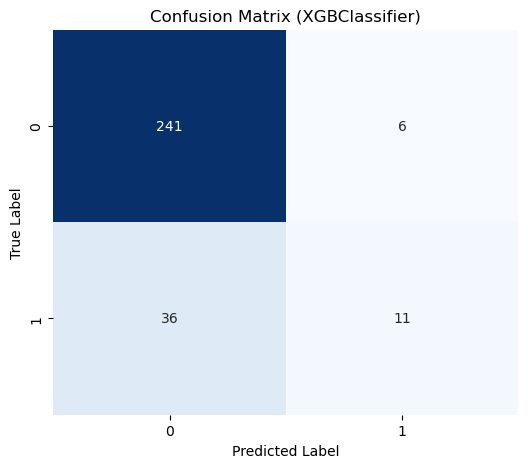

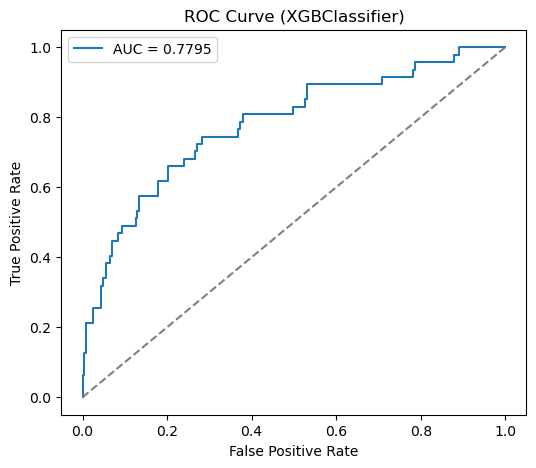

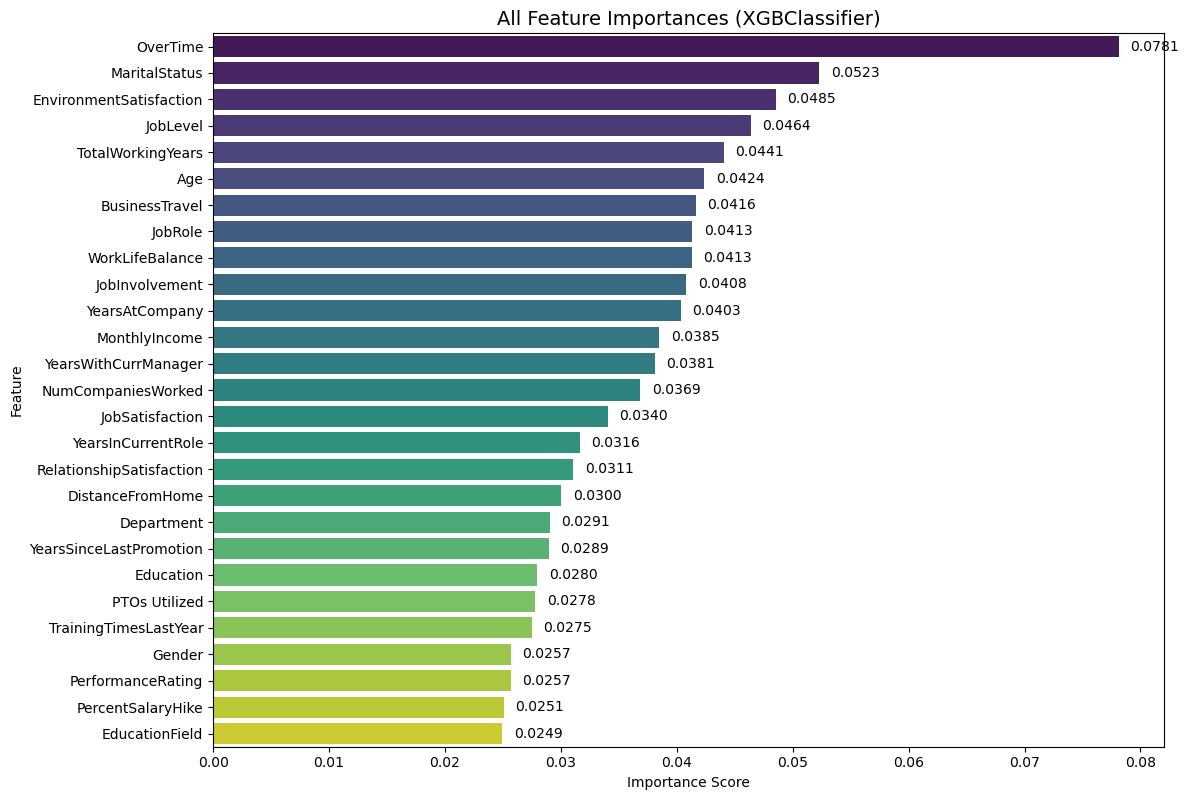

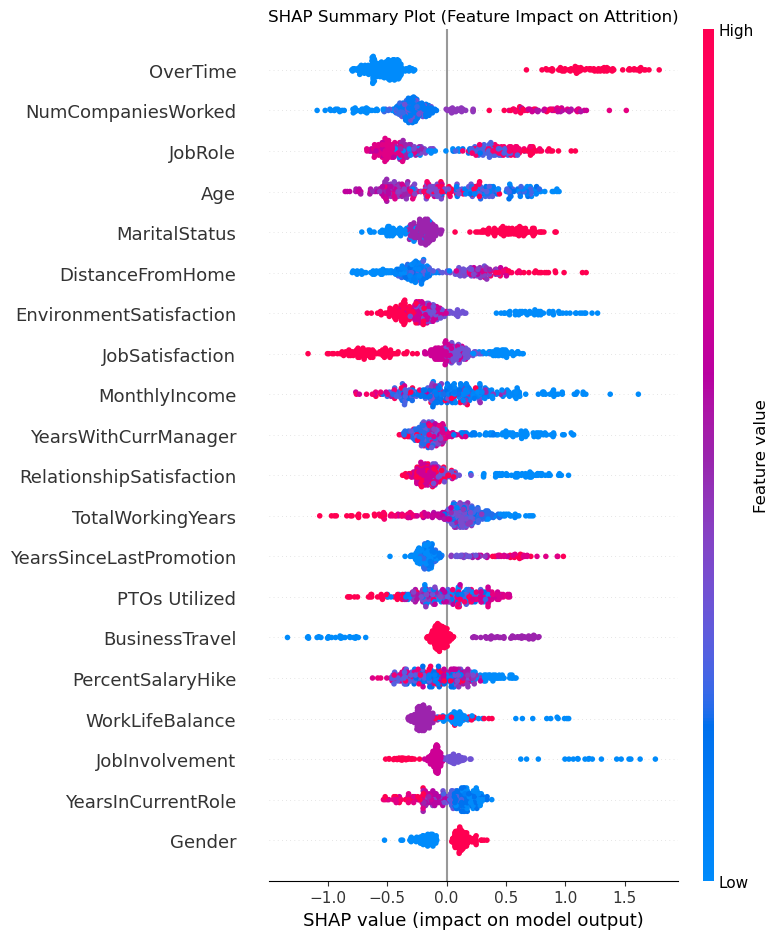

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# ----------------------------
# 1. Train/Test Split
# ----------------------------
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----------------------------
# 2. Train XGBoost Classifier
# ----------------------------
xgb_clf = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=42
)

xgb_clf.fit(X_train, y_train)

# ----------------------------
# 3. Predictions and Metrics
# ----------------------------
y_pred = xgb_clf.predict(X_test)
y_proba = xgb_clf.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# ----------------------------
# 4. Confusion Matrix
# ----------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (XGBClassifier)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ----------------------------
# 5. ROC Curve
# ----------------------------
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.4f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("ROC Curve (XGBClassifier)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# ----------------------------
# 6. Feature Importance Plot
# ----------------------------
importances = xgb_clf.feature_importances_
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(12, max(6, len(feature_importance) * 0.3)))
sns.barplot(
    data=feature_importance,
    x="Importance", y="Feature", palette="viridis"
)
for i, (importance, feature) in enumerate(
    zip(feature_importance["Importance"], feature_importance["Feature"])
):
    plt.text(importance + 0.001, i, f"{importance:.4f}", va="center")
plt.title("All Feature Importances (XGBClassifier)", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# ----------------------------
# 7. SHAP Summary Plot
# ----------------------------
explainer = shap.Explainer(xgb_clf, X_train)
shap_values = explainer(X_test)

plt.title("SHAP Summary Plot (Feature Impact on Attrition)")
shap.summary_plot(shap_values, X_test, show=True)


              precision    recall  f1-score   support

           0       0.88      0.96      0.92       255
           1       0.39      0.18      0.25        39

    accuracy                           0.85       294
   macro avg       0.64      0.57      0.58       294
weighted avg       0.82      0.85      0.83       294

ROC AUC: 0.7692


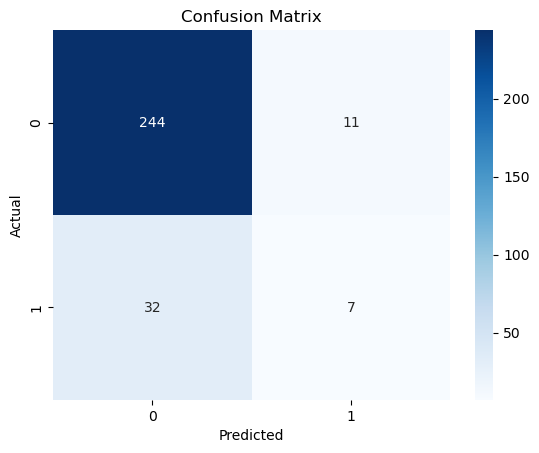

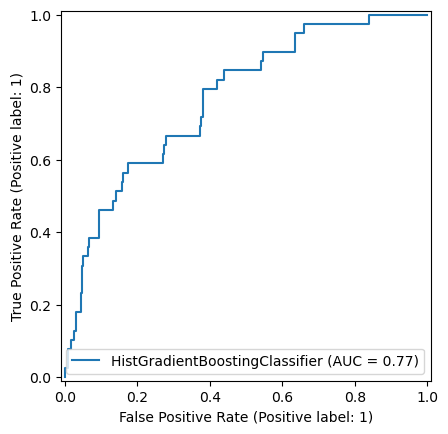

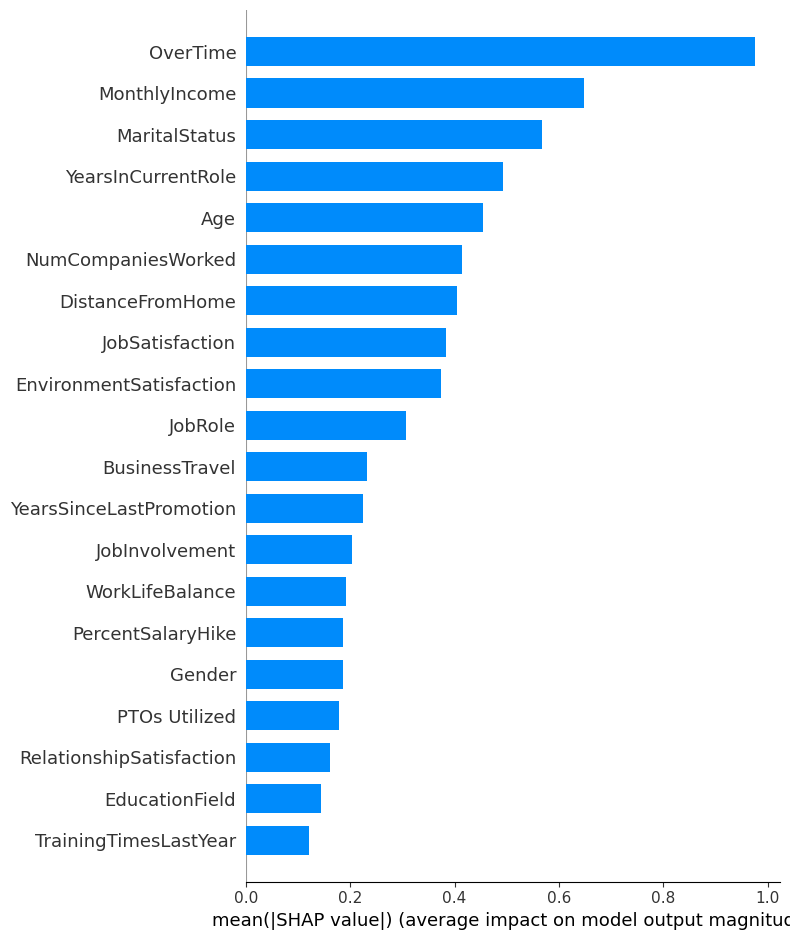

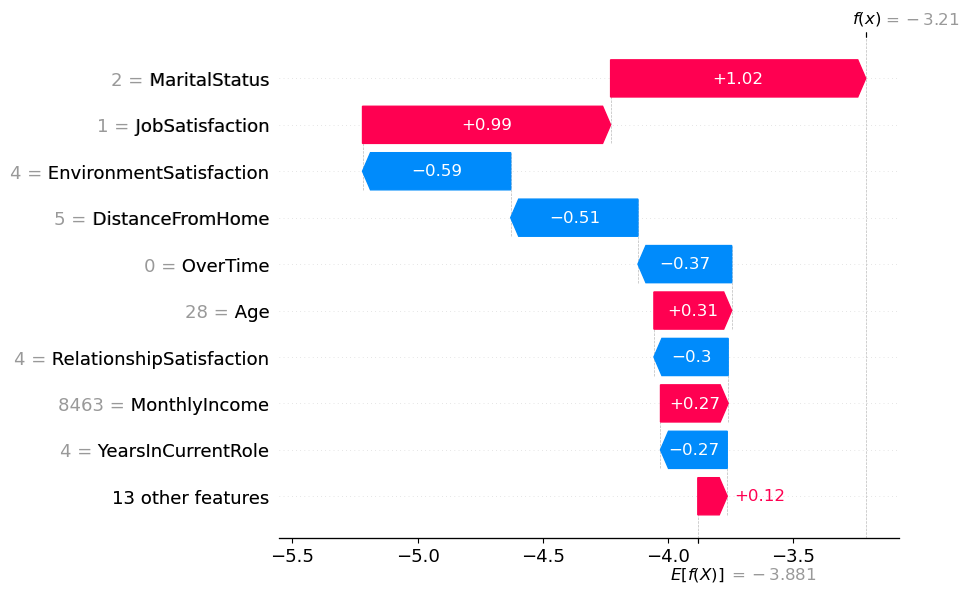

In [16]:
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import pandas as pd
import numpy as np

# --- Example setup ---
# Replace with your dataset and classification target
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Train model ---
clf = HistGradientBoostingClassifier(random_state=42)
clf.fit(X_train, y_train)

# --- Model evaluation ---
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- ROC Curve ---
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()

# --- SHAP analysis ---
# For scikit-learn gradient boosting, TreeExplainer works fine
explainer = shap.Explainer(clf)
shap_values = explainer(X_test)

# --- 1️⃣ Global SHAP Summary Plot ---
shap.summary_plot(shap_values, X_test, plot_type="bar")

# --- 2️⃣ Local explanation for one sample ---
i = 0  # choose an index to visualize (e.g., one test record)
shap.initjs()
shap.plots.waterfall(shap_values[i])


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 986
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000281 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 475
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161565 -> initscore=-1.646632
[LightGBM] [Info] Start training from score -1.646632
✅ Classification Report:
               precision    recall  f1-score   support

           0     0.8759    0.9717    0.9213       247
           1     0.6500    0.2766    0.3881        47

    accuracy                         0.8605       294
   macro avg     0.7630    0.6241    0.6547       294
weighted avg     0.8398    0.8605    0.8361       294

ROC-AUC Score: 

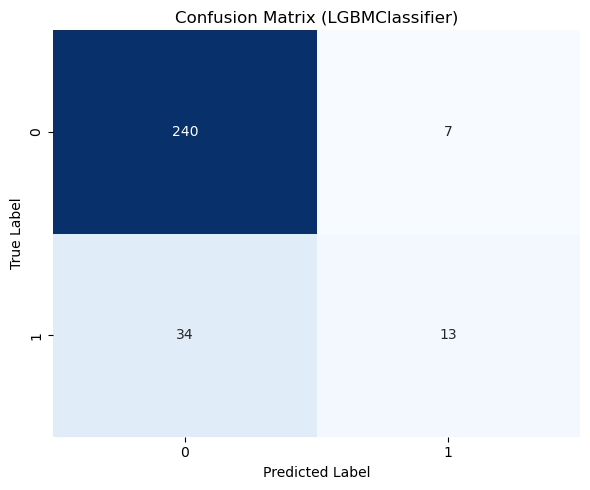

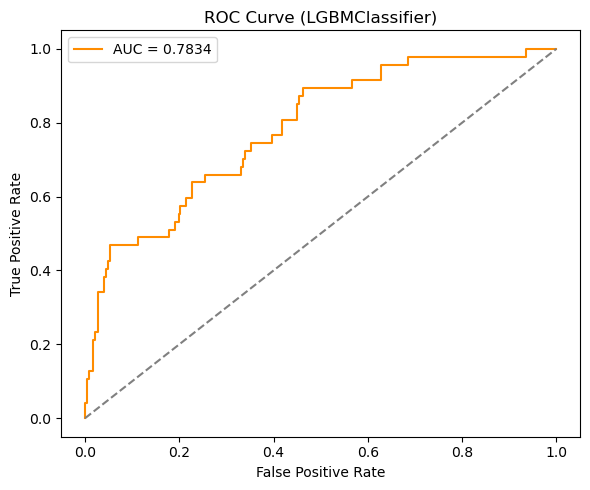

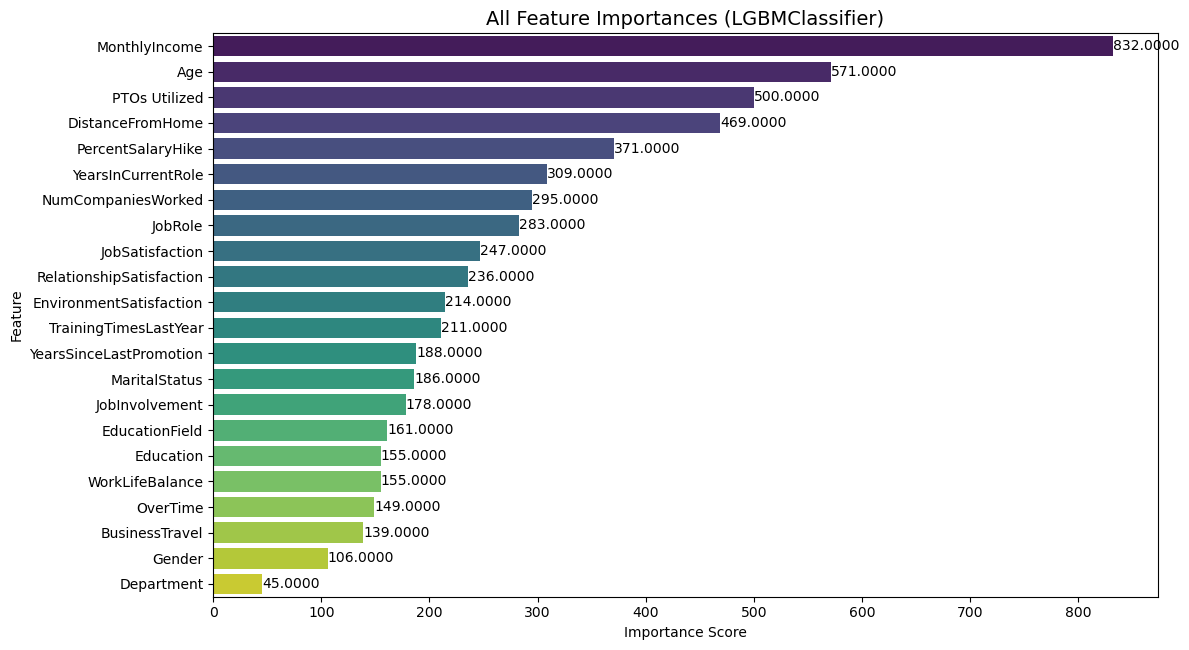

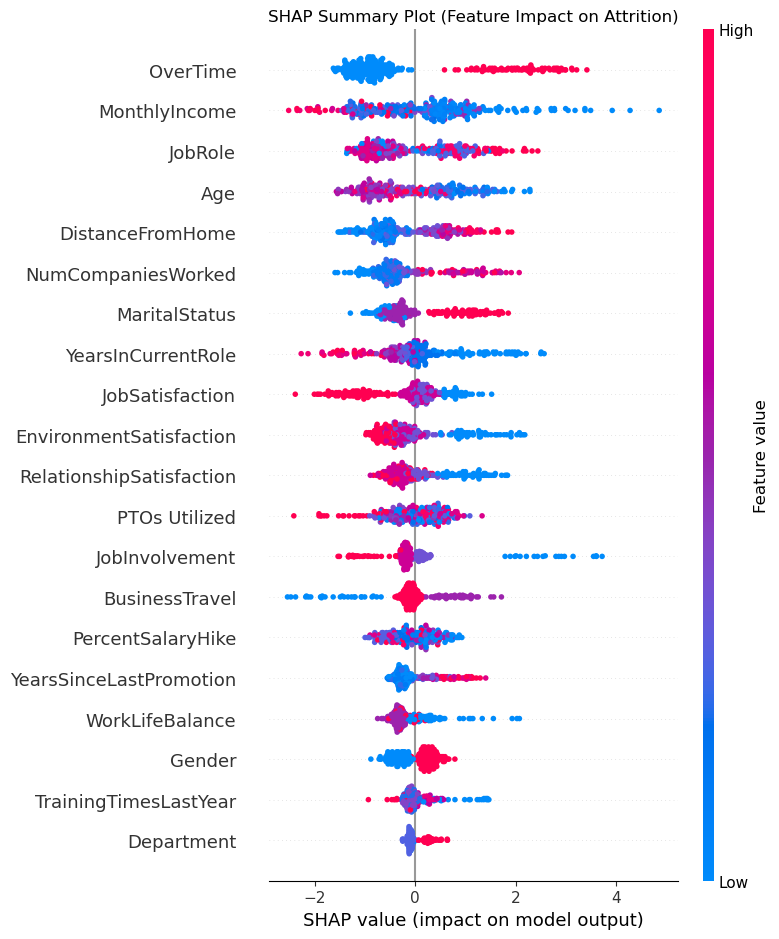

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, roc_curve
)
from sklearn.model_selection import train_test_split

# ----------------------------
# 1. Train/Test Split
# ----------------------------
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----------------------------
# 2. Train LightGBM Classifier
# ----------------------------
lgbm_clf = LGBMClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective="binary",
    metric="binary_logloss"
)

lgbm_clf.fit(X_train, y_train)

# ----------------------------
# 3. Predictions and Metrics
# ----------------------------
y_pred = lgbm_clf.predict(X_test)
y_proba = lgbm_clf.predict_proba(X_test)[:, 1]

print("✅ Classification Report:\n", classification_report(y_test, y_pred, digits=4))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# ----------------------------
# 4. Confusion Matrix
# ----------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (LGBMClassifier)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# ----------------------------
# 5. ROC Curve
# ----------------------------
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.4f}", color="darkorange")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("ROC Curve (LGBMClassifier)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()

# ----------------------------
# 6. Feature Importance Plot
# ----------------------------
importances = lgbm_clf.feature_importances_
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(12, max(6, len(feature_importance) * 0.3)))
sns.barplot(
    data=feature_importance,
    x="Importance", y="Feature", palette="viridis"
)
for i, (importance, feature) in enumerate(
    zip(feature_importance["Importance"], feature_importance["Feature"])
):
    plt.text(importance + 0.001, i, f"{importance:.4f}", va="center")
plt.title("All Feature Importances (LGBMClassifier)", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# ----------------------------
# 7. SHAP Summary Plot
# ----------------------------
explainer = shap.Explainer(lgbm_clf, X_train)
shap_values = explainer(X_test)

plt.title("SHAP Summary Plot (Feature Impact on Attrition)")
shap.summary_plot(shap_values, X_test, show=True)


In [18]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

# # --- Select your features ---
# # Example: choose some columns manually
# features = [
#     "Age", "MonthlyIncome", "JobSatisfaction", "DistanceFromHome",
#     "YearsAtCompany", "Education"
# ]  # <-- change this list to the columns you want to include

# # --- Split data into X (features) and y (target) ---
# X = df[features]
# y = df[target_col]

# --- Define target column ---
target_col = "Attrition"  # Change this to your regression target

# --- Use the balanced dataset ---
# (Assuming X_bal and y_bal are already defined and preprocessed)
X = X_bal
y = y_bal

# --- Encode categorical columns in X automatically ---
X = pd.get_dummies(X, drop_first=True)

# --- Encode target if it's categorical (not typical for regression, but just in case) ---
if y.dtype == "object":
    le = LabelEncoder()
    y = le.fit_transform(y)

# --- Convert to float32 (as in diabetes example) ---
X = X.astype(np.float32)
y = y.astype(np.float32)

# --- Shuffle and split the dataset ---
X, y = shuffle(X, y, random_state=13)
offset = int(X.shape[0] * 0.9)

X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

# --- Run LazyRegressor ---
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# --- Display results ---
print("✅ Model Comparison Results:")
display(models)


  0%|          | 0/42 [00:00<?, ?it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 366
[LightGBM] [Info] Number of data points in the train set: 426, number of used features: 22
[LightGBM] [Info] Start training from score 0.492958
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,-0.45,0.23,0.44,0.09
RandomForestRegressor,-0.47,0.22,0.44,0.13
NuSVR,-0.49,0.21,0.44,0.01
SVR,-0.51,0.20,0.44,0.01
OrthogonalMatchingPursuitCV,-0.51,0.20,0.44,0.01
LassoLarsCV,-0.53,0.19,0.45,0.01
LarsCV,-0.53,0.19,0.45,0.01
ElasticNetCV,-0.53,0.19,0.45,0.03
LassoCV,-0.53,0.19,0.45,0.03


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import shap

# ----------------------------
# 1. Define Target & Features
# ----------------------------
target_col = "YearsInCurrentRole"
X = df.drop(columns=[target_col])
y = df[target_col]

# ----------------------------
# 2. Train/Test Split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ----------------------------
# 3. Train the Model
# ----------------------------
hgb = HistGradientBoostingRegressor(
    learning_rate=0.1,
    max_depth=None,
    max_iter=300,
    random_state=42
)
hgb.fit(X_train, y_train)

# ----------------------------
# 4. Model Predictions
# ----------------------------
y_pred = hgb.predict(X_test)

# ----------------------------
# 5. Evaluation Metrics
# ----------------------------
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("✅ Model Evaluation Metrics (Rounded to 4 Decimals):")
print(f"MAE :  {mae:.4f}")
print(f"RMSE:  {rmse:.4f}")
print(f"R²   :  {r2:.4f}\n")

# ----------------------------
# 6. Feature Importances (Gain-based)
# ----------------------------
importances = hgb.feature_importances_
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(12, max(6, len(feature_importance) * 0.3)))
sns.barplot(
    data=feature_importance,
    x="Importance", y="Feature", palette="viridis"
)
for i, (importance, feature) in enumerate(
    zip(feature_importance["Importance"], feature_importance["Feature"])
):
    plt.text(importance + 0.001, i, f"{importance:.4f}", va="center")
plt.title("Feature Importances (HistGradientBoostingRegressor)", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# ----------------------------
# 7. SHAP Summary Plot
# ----------------------------
explainer = shap.Explainer(hgb)
shap_values = explainer(X_test)

plt.title("SHAP Summary Plot (Impact on YearsInCurrentRole)")
shap.summary_plot(shap_values, X_test, show=True)

# ----------------------------
# 8. “Coefficients” (SHAP Mean Impact)
# ----------------------------
mean_abs_shap = np.abs(shap_values.values).mean(axis=0)
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Mean |SHAP| (Importance)": mean_abs_shap
}).sort_values(by="Mean |SHAP| (Importance)", ascending=False)

print("\n📈 Feature ‘Coefficients’ Equivalent (Mean |SHAP| Values):")
print(coef_df.round(4))


✅ Model Evaluation Metrics (Rounded to 4 Decimals):
MAE :  2.3369
RMSE:  3.0282
R²   :  0.3152



AttributeError: 'HistGradientBoostingRegressor' object has no attribute 'feature_importances_'